# WELCOME TO SOUNDERPY 

### VERTICAL PROFILE DATA RETRIEVAL TOOL

----------------------

In [2]:
# first, import sounderpy! Its fun to import as 'spy'!
import sounderpy as spy


## ------------------ VERTICAL PROFILE DATA RETRIEVAL TOOL ------------------------ ##
##                           v0.1.0 | July 15, 2023                                  ##
##                             (C) KYLE J GILLETT                                   ##
##         THIS TOOL CAN LOAD RAOB, RAP, RUC, ERA5 AND VERTICAL PROFILE DATA        ##
##  CALL THE FUNCTION '.get_docs()' TO PRINT SIMPLE DOCUMENTATION FOR THIS PACKAGE  ##
## -------------------- THANK YOU FOR USING THIS PACKAGE -------------------------- ##



### READ OUT THE DOCS!

In [7]:
spy.get_docs()


## ------------ VERTICAL PROFILE DATA RETRIEVAL TOOL DOCUMENTATION ----------------
## check out the full documentation here: https://github.com/kylejgillett/sounderpy/blob/main/DOCUMENTATION.md
## 
## SounderPy can access and parse data from:
## > ECMWF CDS ERA5 reanalysis [1940-present] *note: you must set up an account through the CDS to unlock ERA5 data. 
##    (see: https://cds.climate.copernicus.eu/api-how-to)
## > UNIDATA THREDDS TDS RAP reanalysis [2005-present]
## > UNIDATA THREDDS TDS RUC reanalysis [2005-2020]
## > The University of Wyoming RAOB archive [1973-present, depending on station]
## > Iowa State University's RAOB archive [1945-present, depending on station]
##
##
## COPYRIGHT
## ---------
## Created by Kyle J Gillett (@wxkylegillett) 2023
##
## Version: v0.1.0 | July 15, 2023
## --------------------------------------------------------------------------------
##
## TOOLS INCLUDED IN THIS PACKAGE:
## -------------------------------
## get_docs(): [function, prints q

### GETTING SET UP

In [16]:
# we only need a few user-defined variables here, the first will be some dates!
# add a year, month, day and hour (in UTC time) as a string
year   = '2014'
month  = '06'
day    = '16'
hour   = '18'

# if you are using observations (RAOB) declare the station ID:
station = 'OAX'

# next determine what we are acessing data from, 'era5', 'rap', 'obs' are vaild options!
method = 'rap'

# the last thing we need is location, that is done with a list of a single lat, lon point:
latlon = [41.32, -96.37]

In [17]:
# you could define your own lat/lon pair like we did above 
# or you can get the lat/lon pair for any RAOB or METAR site! Use:
# ROAB:
latlon = spy.raob_latlon('OAX')
# METAR:
latlon = spy.metar_latlon('KOFK')

### LET'S GET SOME RAW MODEL DATA!

In [18]:
raw_data = spy.get_model_data(method, latlon, year, month, day, hour)

-- RAP REANALYSIS DATA ACCESS FUNCTION --
-----------------------------------------
DATASET USED: RAP_13km_anl_old
- COMPLETE -
RUNTIME: 00:00:19


### TIME TO CLEAN IT UP FOR SIMPLE PLOTTING!

In [19]:
clean_data = spy.parse_data(raw_data)

-- RAP REANALYSIS DATA PARSE FUNCTION --
------------------------------------------
- COMPLETE -
RUNTIME: 00:00:00


### CHECK OUT HOW SIMPLE THIS DATA IS!

In [20]:
clean_data

{'T': array([ 23.25112915,  22.65273994,  22.05106718,  19.57840571,
         18.84373921,  18.81938642,  19.11133998,  19.35336752,
         18.67988234,  17.3751562 ,  15.83108841,  13.99619227,
         12.16765724,  10.35562032,   8.4872195 ,   6.51361702,
          4.54137599,   2.46960632,   0.33101047,  -1.8587818 ,
         -4.08864462,  -6.27655191,  -8.45672043, -10.65824979,
        -12.47891911, -14.16945581, -15.79826696, -17.41531682,
        -19.02344991, -20.7399808 , -22.4833175 , -24.3528971 ,
        -26.24344978, -28.2259682 , -30.2355302 , -32.34980786,
        -34.46416644, -36.57915316, -38.69413988, -40.67759938,
        -42.64618296, -44.61383052, -46.58068159, -48.54756984,
        -50.51990503, -52.49224022, -54.33484729, -55.82881191,
        -57.32277654, -58.48201458, -58.78847915, -59.09494372,
        -59.40140828, -59.71204388, -60.02294858, -60.33385329,
        -60.60382221, -60.46984831, -60.33587441, -60.20190051,
        -60.06792661, -60.01066921,

### NOW WE CAN MAKE A QUICK METPY SOUNDING PLOT!

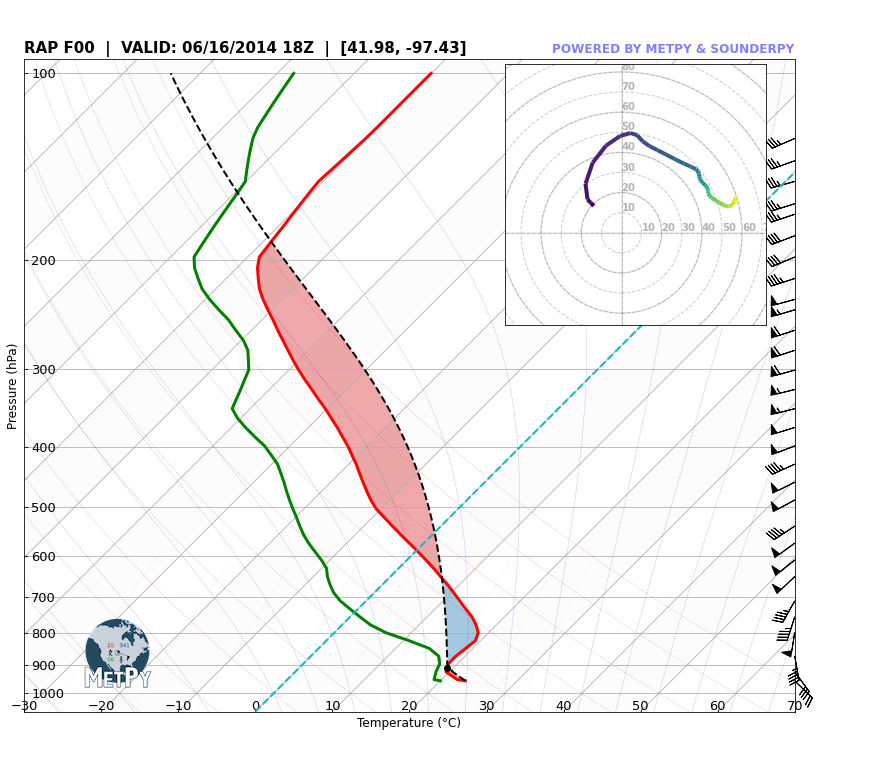

RUNTIME: 00:00:00


In [21]:
spy.metpy_sounding(clean_data)

### LETS TRY SOME RAOB DATA!

In [22]:
clean_data = spy.get_obs_data(station, year, month, day, hour)

FOUND RAOB: OAX on 06/16/2014 at 18z
RUNTIME: 00:00:06


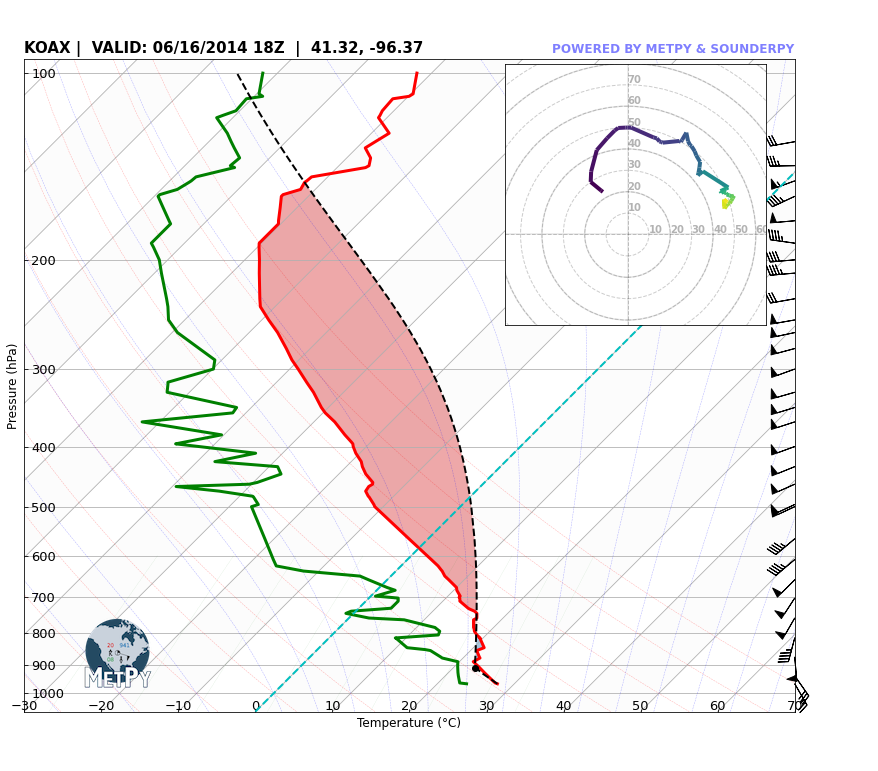

RUNTIME: 00:00:00


In [23]:
spy.metpy_sounding(clean_data)